# 📘 1. Business Understanding
Tujuan dari proyek ini adalah untuk memprediksi tingkat risiko diabetes berdasarkan data gejala dan karakteristik pasien. Dengan memanfaatkan algoritma Random Forest, sistem diharapkan mampu mengklasifikasi pasien menjadi risiko tinggi atau rendah secara akurat. Solusi ini akan membantu deteksi dini diabetes.

# 📊 2. Data Understanding
Dataset:
- Sumber: Kaggle (diabetes_risk_prediction_dataset.csv)
- Jumlah data: 520 entri pasien
- Jumlah fitur: 16 gejala + 1 target (class)

Contoh Fitur:
Age, Gender, Polyuria, Polydipsia, Sudden weight loss, Weakness, Obesity, dst.

Target: class (Positive = mengidap diabetes, Negative = tidak

### 📥 Mount Google Drive, Load dan Tinjau Data

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/KK/UAS KK/diabetes_risk_prediction_dataset.csv')
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# 🧹 3. Data Preparation

### 📌 a. Encoding Kategorikal → Numerik

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### 📌 b. Cek Missing Value dan Duplicate

In [35]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64
Duplicate rows: 269


### 📌 c. Split Fitur dan Label

In [36]:
X = df.drop('class', axis=1)
y = df['class']

print("Fitur (X):")
print(X.head())

print("\nLabel (y):")
print(y.head())


Fitur (X):
   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
0                1                0                 1 

# ⚙️ 4. Modeling (Random Forest)

### 📌 a. Split Data (80:20)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Distribusi label di data training:")
print(y_train.value_counts())

print("\nDistribusi label di data testing:")
print(y_test.value_counts())


Distribusi label di data training:
class
1    249
0    167
Name: count, dtype: int64

Distribusi label di data testing:
class
1    71
0    33
Name: count, dtype: int64


### 📌 b. Train Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=45)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=45)

# 📈 5. Evaluation

### 📌 a. Evaluasi Akurasi & Report

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


Confusion Matrix:
 [[33  0]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Accuracy: 99.04 %


### 📌 b. ROC AUC & Visualisasi

AUC Score: 99.87 %


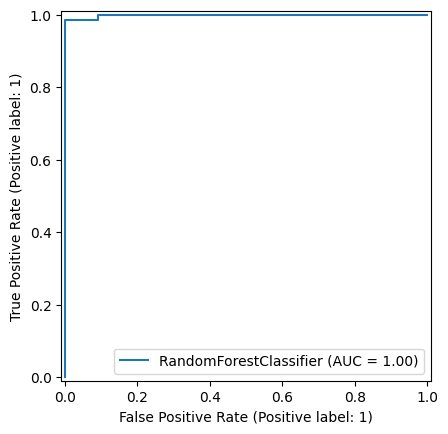

In [40]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", round(roc_score * 100, 2), "%")

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


# 📊 6. Deployment (Interpretasi & Visualisasi Fitur)

               Feature  Importance
2             Polyuria    0.235105
3           Polydipsia    0.181332
0                  Age    0.100572
1               Gender    0.088847
4   sudden weight loss    0.063082
12     partial paresis    0.044203
10        Irritability    0.042128
14            Alopecia    0.040519
11     delayed healing    0.033312
9              Itching    0.029744
8      visual blurring    0.027462
6           Polyphagia    0.025871
13    muscle stiffness    0.025743
5             weakness    0.024613
7       Genital thrush    0.023353
15             Obesity    0.014113


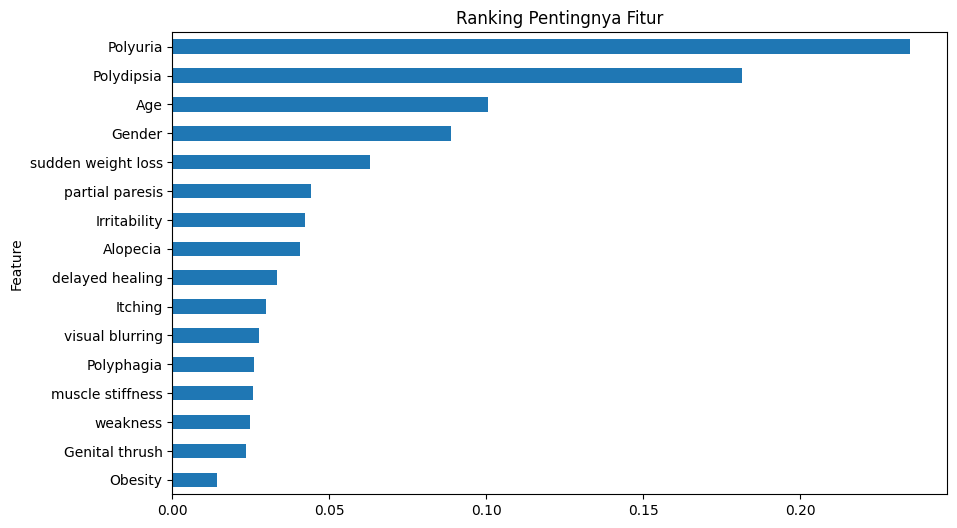

In [41]:
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10,6))
plt.title("Ranking Pentingnya Fitur")
plt.gca().invert_yaxis()
plt.show()


In [43]:
import joblib

# Buat path folder tujuan penyimpanan
save_path = '/content/drive/MyDrive/KK/UAS KK'

# Simpan model Random Forest
joblib.dump(model, f'{save_path}/model_random_forest.pkl')

print("Model Random Forest berhasil disimpan di folder 'UAS KK'.")


Model Random Forest berhasil disimpan di folder 'UAS KK'.
